In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from functions import utils
from functions import utils_dtw
import os.path as path

# # User selects a pacbio dataset
# sample_file = utils.gui_fname().decode("utf-8")
# tokens = sample_file.split('/')
# base = path.basename(sample_file)
# abs_dir = path.dirname(sample_file)
# prefix = base.split('.')[0]
# sample_prefix = abs_dir + '/' + prefix
# print("Sample: \n%s" %sample_file)

# sample_prefix = '/Users/ashleefeng/OneDrive - Johns Hopkins/PacBio/pacbio_example/30s_43N43_Cy3-DNA_Cy5-H2A/m181207_211324_42131_c000468682559900001500000112312060_s1_p0'
sample_prefix2 = '/Users/ashleefeng/OneDrive - Johns Hopkins/PacBio/181207_Ashlee/10min_43N43_Cy5H2A_100ms/m181207_213534_42131_c000468692559900001500000112312030_s1_p0'

# User input
N_CLASS = 4
CLS_EXAMPLE = [155235, 41781, 119778, 153043] # 10 min, random, slow decrease, photobleaching, trasient increase

## Load data

In [4]:
raw_traces, decode_array, time_axis = utils.load_data(sample_prefix2)
traces = utils_dtw.smoothen_cy5(raw_traces[:], 3)
n_traces = traces.shape[0]
n_frames = traces.shape[1]

colors = ['green', (0, 1, 0), 'red', 'orange']
lasers = ['Cy3', 'Cy3.5', 'Cy5', 'Cy5.5']
init_class = np.zeros((N_CLASS, n_frames))

Time passed: 74.44844579696655


In [5]:
scaled_data_cy5 = utils_dtw.normalize(traces)

Time passed: 73.8839042186737


In [6]:
labels_p = utils_dtw.dtw_classification_parallel(scaled_data_cy5, 4, n_frames, CLS_EXAMPLE)

Time passed: 577.8968348503113


(array([71682.,     0.,     0., 85868.,     0.,     0.,  4617.,     0.,
            0.,  1315.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

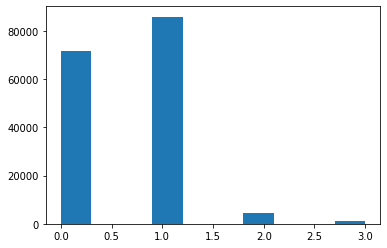

In [7]:
# labels_p = np.loadtxt('results/10min_labels_4_classes.csv')
plt.hist(labels_p)

In [8]:
classes = utils_dtw.class_extractor(labels_p, 4)

In [ ]:
# plt.figure(figsize=(13, 4))
# traceID = np.random.choice(classes[3])
# plt.plot(time_axis, raw_traces[traceID, 2, :], 'r')
# plt.show()
# print(traceID)

In [ ]:
#np.savetxt("results/10min_labels_4_classes_avg5frames.csv", labels_p, delimiter=",", fmt='%i')

# Class 0: Constant (Probably an empty well)

In [12]:
cy5_traces = raw_traces[:, 2, :]

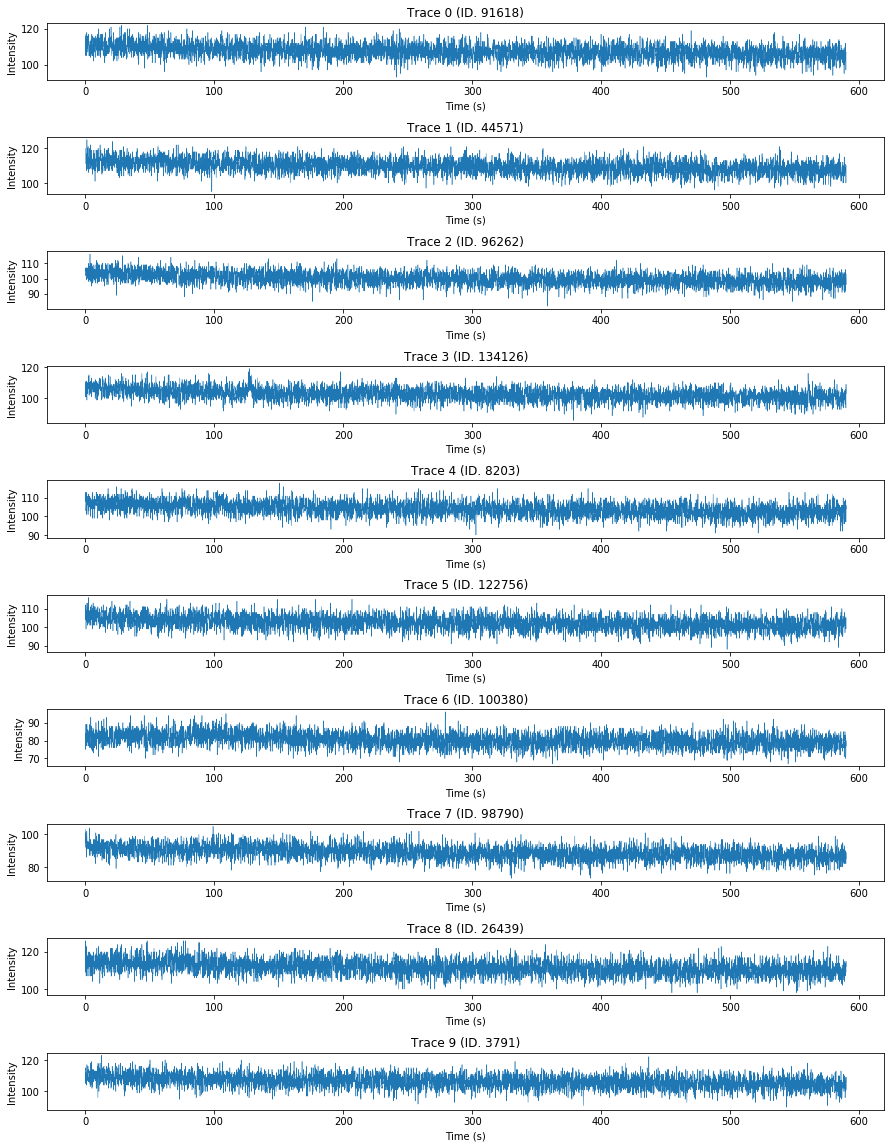

In [13]:
n=10
utils_dtw.plot_traces(cy5_traces, np.random.choice(classes[0], size=(n,)), time_axis)

# Class 1: Slow decrease (Not sure why they exist, junk)

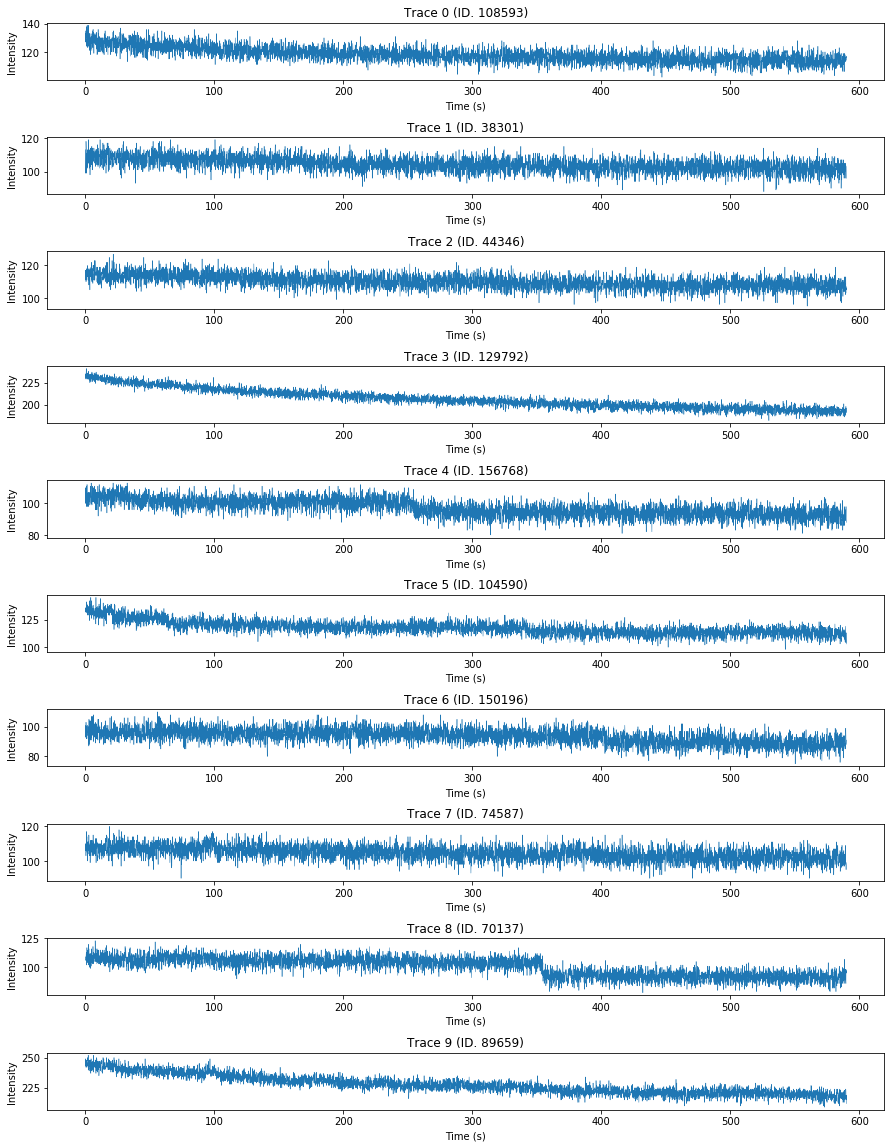

In [14]:
utils_dtw.plot_traces(cy5_traces, np.random.choice(classes[1], size=(n,)), time_axis)

# Class 2: Photobleaching (Good traces!)

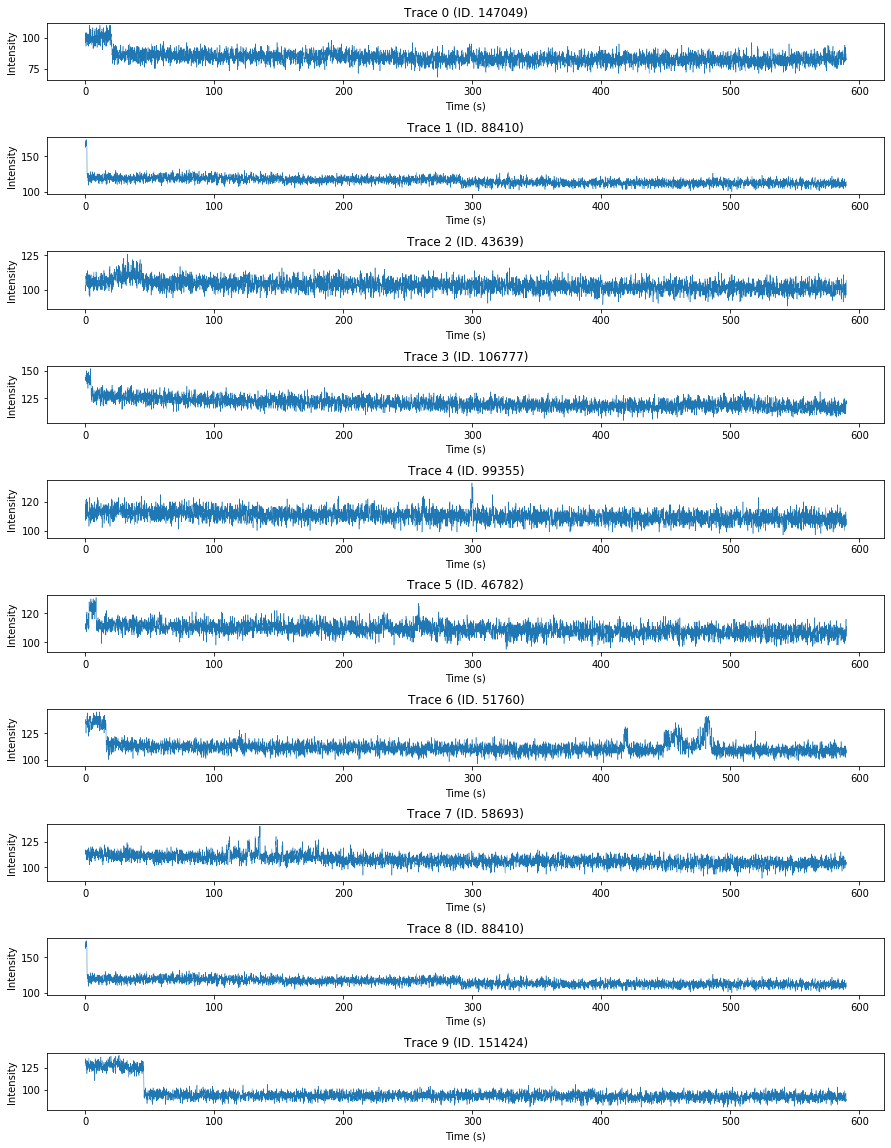

In [15]:
utils_dtw.plot_traces(cy5_traces, np.random.choice(classes[2], size=(n,)), time_axis)

# Class 3: Transient increase (Not sure why they exist, but can be useful)

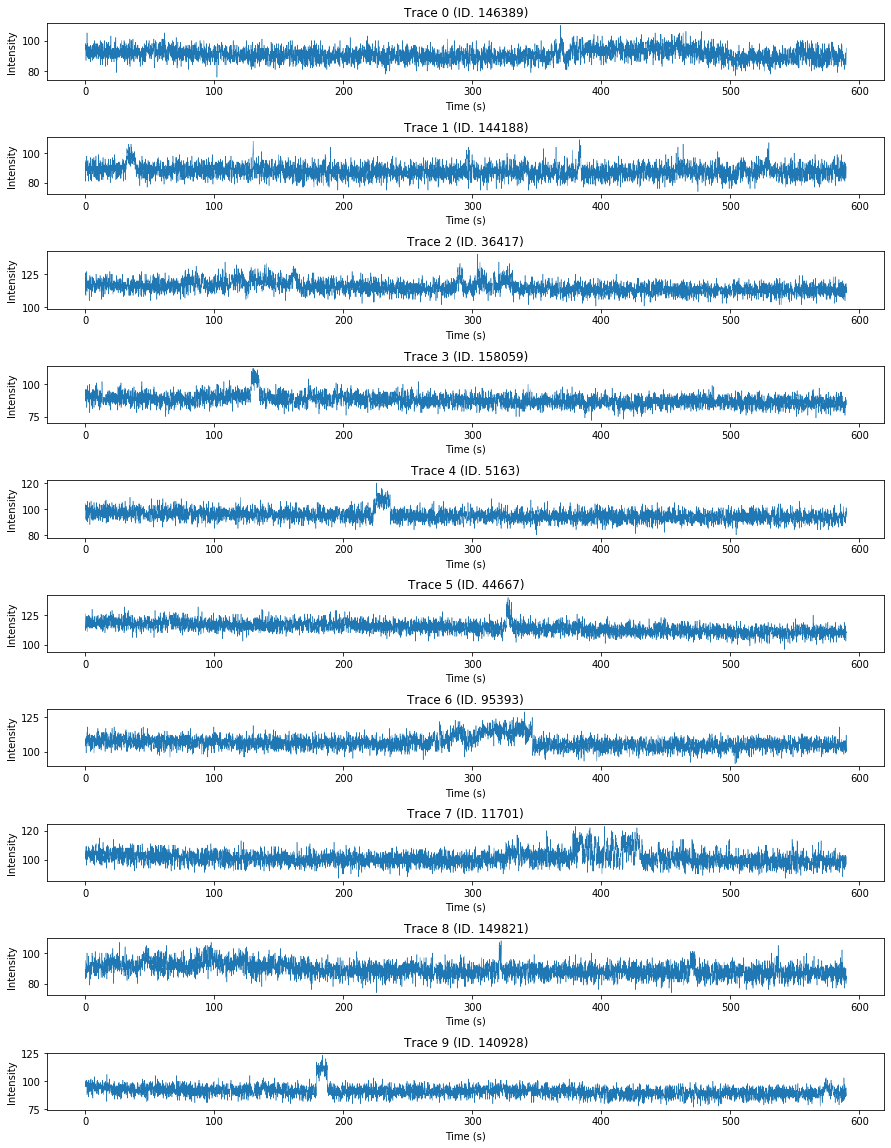

In [16]:
utils_dtw.plot_traces(cy5_traces, np.random.choice(classes[3], size=(n,)), time_axis)